<a href="https://colab.research.google.com/github/joaovitor-lemes/Projetos/blob/main/Analise_de_Dados_do_Airbnb_em_Nova_York.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analisando Dados do Airbnb da Cidade de Nova York

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Nova York, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Nova York (good for visualisations).*

Importante: O portal está em constante evolução, e em determinado momento, pode ser que o [conjunto de dados](http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-04-26/visualisations/listings.csv) exato utilizado nesse notebook não esteja mais disponível, o que quebraria nosso código.

In [2]:
# Inicialmente vamos importar as Bibliotecas que serão utilizadas no projeto

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Identificação dos Dados

> É muito importante entender as váriáveis do projeto e o que elas representam, para tanto, preparamos um índice explicativo de cada variável para orientar o leitor sobre os dados de cada coluna.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias
* `Licenses` - Licença para para alugar o imóvel

Antes de iniciar qualquer análise, vamos verificar o nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# Leitura das 5 primeiras linhas do Dataset

df = pd.read_csv('https://raw.githubusercontent.com/joaovitor-lemes/An-lise-Airbnb/refs/heads/main/listings.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,0.27,3,365,0,NaN
1,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,83.0,30,195,2024-10-05,1.04,1,185,4,NaN
2,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,2022-06-05,0.03,2,83,0,NaN
3,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,71.0,30,250,2024-10-31,1.37,1,284,4,NaN
4,7064,"Amazing location! Wburg. Large, bright & tranquil",17297,Joelle,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,NaN,30,13,2022-09-12,0.08,2,0,0,NaN


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

É importante entender de início a quantidade de entradas do Dataset para termos uma ideia da dimensão do que pode ser feito, bem como o tipo de análise que será feito.

In [4]:
# Através do comando shape é possível identificar a quantidade de linhas e colunas do Dataset

print("O Dataset possui {} linhas {} colunas".format(df.shape[0],df.shape[1]))

O Dataset possui 37548 linhas 18 colunas


In [5]:
# O comando dtypes informa o tipo de dado de cada coluna

df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


### **Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `license` possui 85% dos seus valores faltantes.
* A variável `price` possue 39,4% de valores nulos.
* As variáveis `last_review` e `reviews_per_month` têm aproximadamente 31% dos valores nulos.

In [6]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

,0
license,85.740918
price,39.434857
last_review,30.787259
reviews_per_month,30.787259
host_name,0.013316
name,0.005327
host_id,0.000000
neighbourhood_group,0.000000
neighbourhood,0.000000
latitude,0.000000


### **Qual o tipo de distribuição das variáveis?**

Para identificar a distribuição das variáveis, vamos plotar o histograma.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

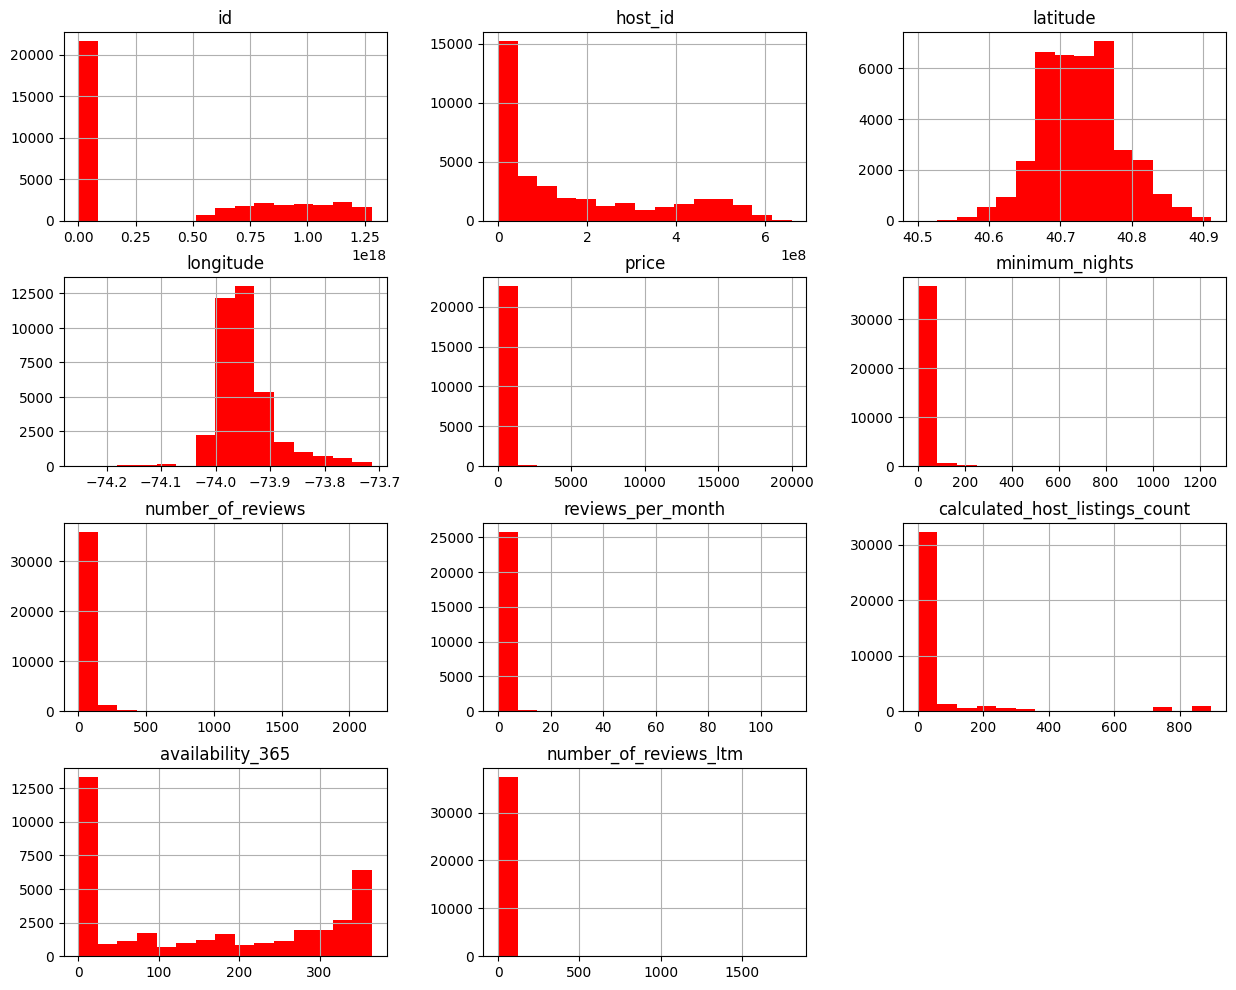

In [7]:
df.hist(bins = 15, figsize = (15,12), color = 'red')

### **Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável

In [8]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,22741.000000,37548.000000,37548.000000,25988.000000,37548.000000,37548.000000
mean,216.737654,29.317407,25.507883,0.888585,57.086609,158.742117
std,380.617571,31.273165,61.318602,1.899124,175.223731,145.516660
min,8.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,85.000000,30.000000,0.000000,0.090000,1.000000,0.000000
50%,149.000000,30.000000,3.000000,0.310000,2.000000,145.500000
75%,250.000000,30.000000,22.000000,1.040000,8.000000,312.000000
max,20000.000000,1250.000000,2165.000000,111.790000,897.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 250, porém seu valor máximo é 20.000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights

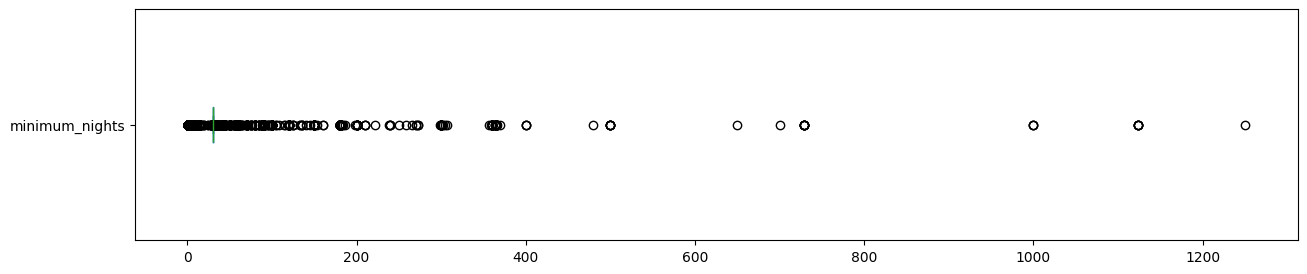

minimum_nights: valores acima de 30:
2420 entradas
6.4451%


In [9]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

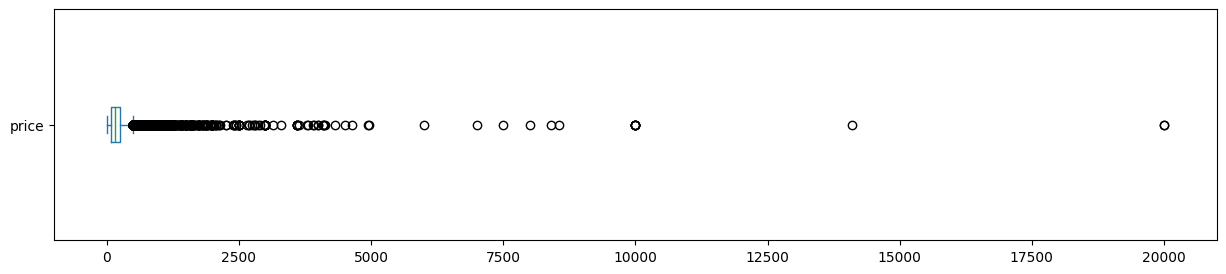


price: valores acima de 1000
284 entradas
0.7564%


In [10]:
df.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 1000 para price
print("\nprice: valores acima de 1000")
print("{} entradas".format(len(df[df.price > 1000])))
print("{:.4f}%".format((len(df[df.price > 1000]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>],
       [<Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>,
        <Axes: title={'center': 'number_of_reviews_ltm'}>, <Axes: >]],
      dtype=object)

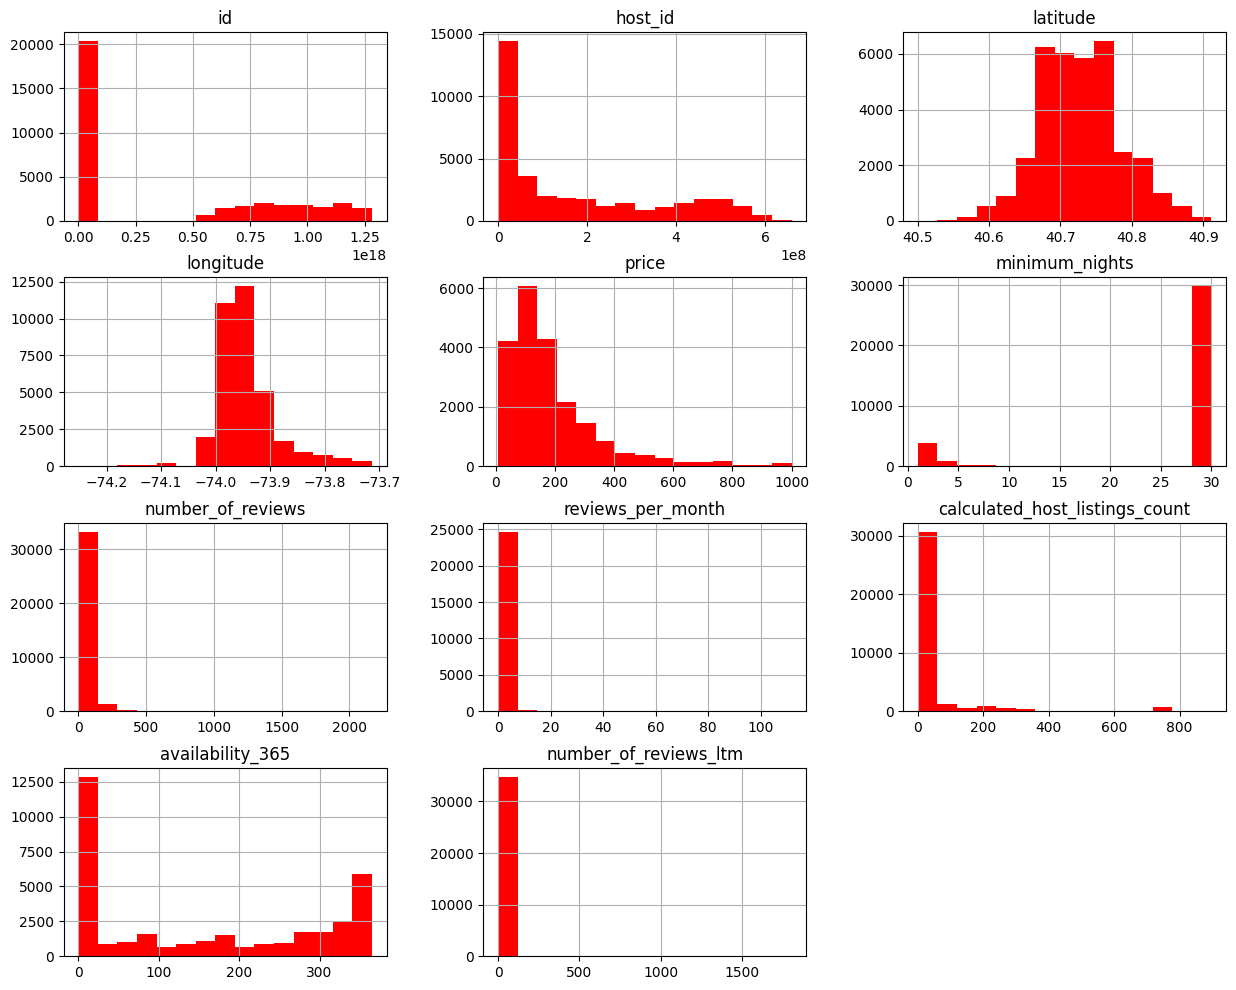

In [11]:
df_limpo = df.copy()
df_limpo.drop(df_limpo[df_limpo.price > 1000].index, axis=0, inplace=True)
df_limpo.drop(df_limpo[df_limpo.minimum_nights > 30].index, axis=0, inplace=True)

df_limpo.hist(bins = 15, figsize = (15,12), color = 'red')

#### Boxplots sem *outliers*

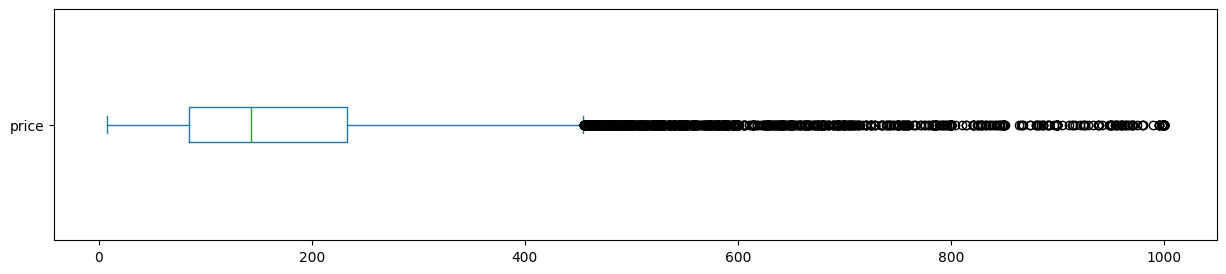

In [12]:
# Plotando o Boxplot do Price após a limpeza dos dados

df_limpo.price.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

Percebe-se que mesmo retirando os dados com preço maior do que 1000 ainda é possível identificar alguns *outliers*, entretanto, é possível entender que o perço até 1000 se trata do valor de imóveis mais caros.

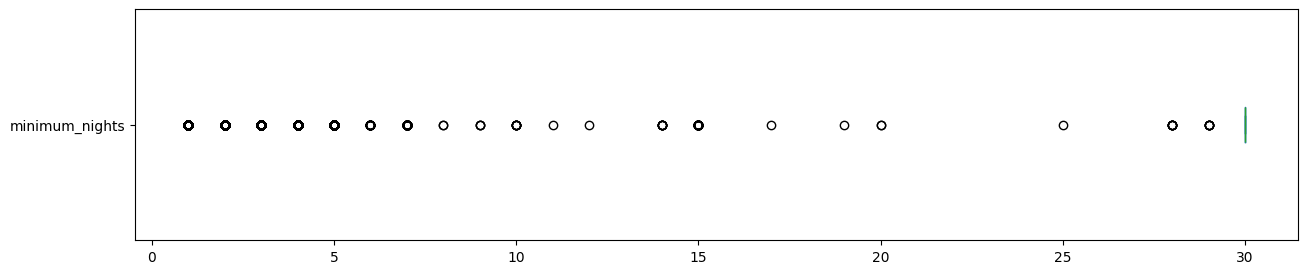

In [13]:
# Plotando o Boxplot de Minimum Nights após a limpeza dos dados

df_limpo.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

É possível identificar ainda alguns outliers, isso porque a maioria dos dados de minimum_nights são 30 dias, entretanto alguns imóveis aceitam estadias menores do que 30 dias em seu contrato.

### **Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [20]:
corr = df_limpo[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.278510,-0.032523,0.064827,-0.044878,0.027795
minimum_nights,-0.278510,1.000000,-0.228989,-0.439780,0.043599,-0.100021
number_of_reviews,-0.032523,-0.228989,1.000000,0.624901,-0.112452,0.080765
reviews_per_month,0.064827,-0.439780,0.624901,1.000000,-0.057499,0.150239
calculated_host_listings_count,-0.044878,0.043599,-0.112452,-0.057499,1.000000,0.220969
availability_365,0.027795,-0.100021,0.080765,0.150239,0.220969,1.000000


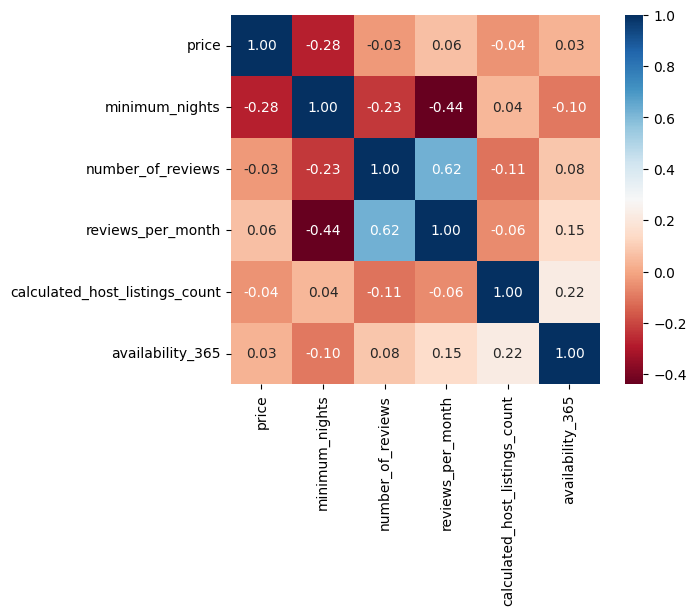

In [23]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [17]:
df_limpo.room_type.value_counts()

,count
room_type,
Entire home/apt,18049
Private room,15923
Hotel room,513
Shared room,378


In [27]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_limpo.room_type.value_counts() / df_limpo.shape[0])*100

,count
room_type,
Entire home/apt,51.771219
Private room,45.673063
Hotel room,1.471474
Shared room,1.084244


### **Qual a localidade mais cara de Nova York?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [30]:
df_limpo.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

,price
neighbourhood,
Fort Wadsworth,600.000000
NoHo,481.153846
Civic Center,477.333333
Tribeca,398.413043
Battery Park City,395.516129
Greenwich Village,383.958333
SoHo,382.622807
Financial District,360.658436
Theater District,347.565401


### **Plotando os imóveis de acordo com Latitude e Longitude**

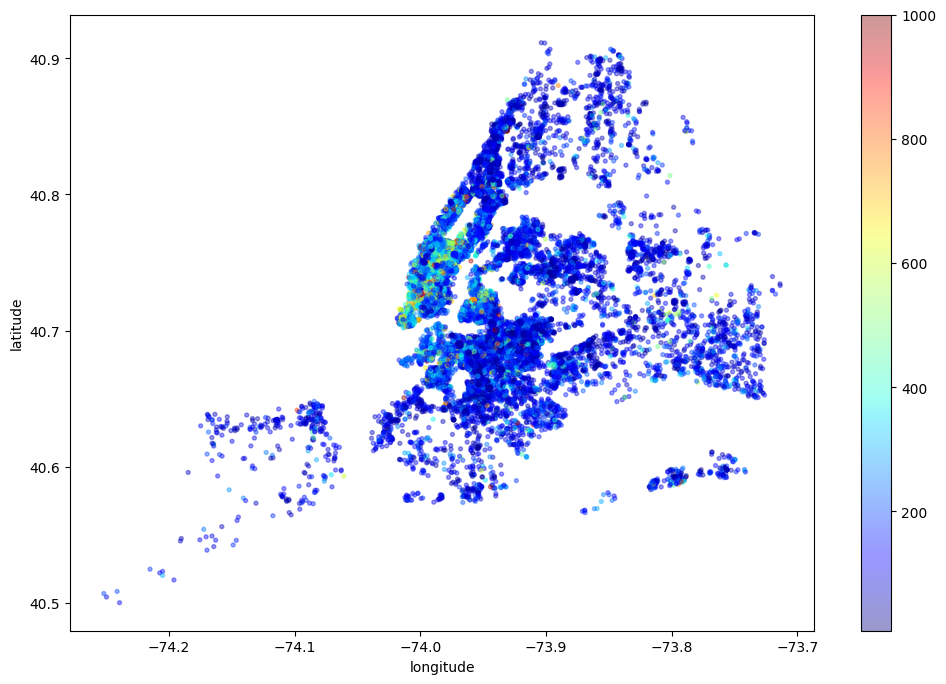

In [31]:
# plotar os imóveis pela latitude-longitude
df_limpo.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_limpo['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));